In [79]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [80]:
N = 100
x = np.random.normal(size=N)
y = 0.5 * x +0.2*(np.random.normal(size=N))
fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='markers', marker={'size':8, 'opacity':0.5}, name='data')])
fig.update_layout(xaxis_title='x', yaxis_title='y', yaxis=dict(scaleanchor='x', scaleratio=1))
fig.show()

## Variance

In [81]:
print(f'Variance of x is {np.var(x)}')
print(f'Variance of y is {np.var(y)}')

Variance of x is 0.7635244604231554
Variance of y is 0.2138413725604535


## Covariance

In [82]:
def covariance(a, b):
    return ((a - a.mean()) * (b - b.mean())).sum() / (len(a)-1)

In [83]:
print(f'Covariance of x & y {covariance(x, y)}')
print(f'Covariance of y & x {covariance(y, x)}')
print(f'Covariance of x & x {covariance(x, x)}, variance of x is {x.var()}')
print(f'Covariance of y & y {covariance(y, y)}, variance of y is {y.var()}')

Covariance of x & y 0.3765350887923912
Covariance of y & x 0.3765350887923912
Covariance of x & x 0.7712368287102579, variance of x is 0.7635244604231554
Covariance of y & y 0.2160013864247005, variance of y is 0.2138413725604535


## Covariance Matrix

In [84]:
data = np.stack((x, y), axis=1)
print('data.shpe', data.shape)
cov = np.cov(data.T)
print(f'covariance matrix is\n {cov}')

data.shpe (100, 2)
covariance matrix is
 [[0.77123683 0.37653509]
 [0.37653509 0.21600139]]


## 3D Space

In [85]:
z = -0.5 * x + 2 * np.random.uniform(size=N)
data = np.stack((x, y, z), axis=0)  # or apply .T method if stack along axis 1
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker={'size':8, 'opacity':0.5}, name='data')])
fig.update_layout(xaxis_title='x', yaxis_title='y', yaxis={'scaleanchor':'x', 'scaleratio':1})
fig.show()

### Eigenvectors

In [86]:
lambdas, vectors = np.linalg.eig(cov)
lambdas, vectors

(array([0.96143346, 0.02580475]),
 array([[ 0.89259052, -0.45086824],
        [ 0.45086824,  0.89259052]]))

In [87]:
A = np.array([[-2,2,1],[-5,5,1],[-4,2,3]])
A

array([[-2,  2,  1],
       [-5,  5,  1],
       [-4,  2,  3]])

In [88]:
def sorted_eig(A):
    lambdas, vectors = np.linalg.eig(A)
    lambdas, vectors = zip(*sorted(zip(list(lambdas), list(vectors.T)), key=lambda x: [0], reverse=True))
    return lambdas, np.array(vectors).T

In [89]:
lambdas, vectors = sorted_eig(A)
lambdas, vectors

((1.0000000000000004, 3.0000000000000013, 1.999999999999999),
 array([[ 0.57735027, -0.40824829,  0.40824829],
        [ 0.57735027, -0.81649658,  0.40824829],
        [ 0.57735027, -0.40824829,  0.81649658]]))

In [90]:
l, v = np.linalg.eig(A)
print(" "*15,"Ours"," "*28,"Numpy")
print(np.array([1,2,1])/np.sqrt(6), v[:,0])
print(np.array([1,1,2])/np.sqrt(6), v[:,1])
print(np.array([1,1,1])/np.sqrt(3), v[:,2])

                Ours                              Numpy
[0.40824829 0.81649658 0.40824829] [0.57735027 0.57735027 0.57735027]
[0.40824829 0.40824829 0.81649658] [-0.40824829 -0.81649658 -0.40824829]
[0.57735027 0.57735027 0.57735027] [0.40824829 0.40824829 0.81649658]


In [91]:
print("A*v_1 / 3 = ",np.matmul(A, np.array([1,2,1]).T)/3 ) # Dividing by eigenvalue
print("A*v_2 / 2 = ",np.matmul(A, np.array([1,1,2]).T)/2 ) #    to get vector back
print("A*v_3 / 1 = ",np.matmul(A, np.array([1,1,1]).T) )

A*v_1 / 3 =  [1. 2. 1.]
A*v_2 / 2 =  [1. 1. 2.]
A*v_3 / 1 =  [1 1 1]


## Eigenvectors for our sample 3D dataset

In [95]:
cov = np.cov((x, y, z))

In [96]:
lambdas, vs = sorted_eig(cov)  # Compute e'vals and e'vectors of cov matrix
print("lambdas, vs =\n",lambdas,"\n",vs)

# Re-plot our data
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers',
                                   marker=dict(size=8,opacity=0.5), name="data" ) ])

# Draw some extra 'lines' showing eigenvector directions
n_ev_balls = 50    # the lines will be made of lots of balls in a line
ev_size= 3    # size of balls
t = np.linspace(0,1,num=n_ev_balls)  # parameterizer for drawing along vec directions

for i in range(3):   # do this for each eigenvector
    # Uncomment the next line to scale (unit) vector by size of the eigenvalue
    # vs[:,i] *= lambdas[i]
    ex, ey, ez = t*vs[0,i], t*vs[1,i],  t*vs[2,i]
    fig.add_trace(go.Scatter3d(x=ex, y=ey, z=ez,mode='markers',
                               marker=dict(size=ev_size,opacity=0.8), name="v_"+str(i+1)))

lambdas, vs =
 (1.168592944776751, 0.2695444486658856, 0.025714480956463736) 
 [[-0.78401953 -0.41999337 -0.45707653]
 [-0.39358706 -0.23304783  0.88925696]
 [ 0.48000272 -0.87709423 -0.01741009]]


In [97]:
lambdas, vectors = sorted_eig(cov)
print(f'lambdas, eigen vectors are \n{lambdas, vectors}')
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker={'size': 8, 'opacity': 0.5}, name='data')])
n_ev_balls = 50  # the lines will be made of lots of balls in a line
ev_size = 3  # size of balls
t = np.linspace(0, 1, num=n_ev_balls)  # param for drawing along vec directions

for i in range(len(vectors)):  # for each eigenvector
    ex, ey, ez, = t * vectors[0, i], t * vectors[1, i], t * vectors[2, i]
    fig.add_trace(go.Scatter3d(x=ex, y=ey, z=ez, mode='markers', marker={'size': ev_size, 'opacity':0.5}, name='data'))

fig.update_layout(xaxis_title='x', yaxis_title='y', yaxis={'scaleanchor':'x', 'scaleratio':1})
fig.show()

lambdas, eigen vectors are 
((1.168592944776751, 0.2695444486658856, 0.025714480956463736), array([[-0.78401953, -0.41999337, -0.45707653],
       [-0.39358706, -0.23304783,  0.88925696],
       [ 0.48000272, -0.87709423, -0.01741009]]))


## Projecting data

In [105]:
lambdas, vs = sorted_eig(cov)

In [106]:
proj_cov = vectors.T @ cov @ vectors

In [107]:
proj_cov

array([[ 1.16859294e+00, -7.31916355e-17, -4.77446147e-17],
       [-1.02180196e-16,  2.69544449e-01,  2.92126142e-18],
       [-4.99550586e-17,  1.09489961e-17,  2.57144810e-02]])

In [108]:
proj_cov[np.abs(proj_cov) < 1e-15] = 0
proj_cov

array([[1.16859294, 0.        , 0.        ],
       [0.        , 0.26954445, 0.        ],
       [0.        , 0.        , 0.02571448]])

In [110]:
data = np.stack((x, y, z), axis=1)
data.shape

(100, 3)

In [112]:
print('1. All data, rotated into new coordinate system')
W = vectors[:, 0:3] # keep all the eigenvectors
new_data_all = data @ W
print(f'Checking: new_data_all.shape is {new_data_all.shape}')
print(f'New covariance matrix is {np.cov(new_data_all.T)}')

print(f'2. Truncated data projected onto principal axes of coordinate system')
W = vectors[:, 0:2]  # keep only the first and 2nd eigenvectors
print(f'W.shape {W.shape}')
new_data_proj = data @ W  # project
print(f"Checking: new_data_proj.shape is {new_data_proj.shape}")
print(f'New covariance matrix in projected space is {np.cov(new_data_proj.T)}')

# Difference between them
diff = new_data_all[:, :2] - new_data_proj
print(f'Absolute maximum difference between the two methods is {np.max(np.abs(diff))}')

1. All data, rotated into new coordinate system
Checking: new_data_all.shape is (100, 3)
New covariance matrix is [[ 1.16859294e+00 -2.27606302e-16 -2.11511738e-16]
 [-2.27606302e-16  2.69544449e-01 -3.60643621e-17]
 [-2.11511738e-16 -3.60643621e-17  2.57144810e-02]]
2. Truncated data projected onto principal axes of coordinate system
W.shape (3, 2)
Checking: new_data_proj.shape is (100, 2)
New covariance matrix in projected space is [[ 1.16859294e+00 -2.27606302e-16]
 [-2.27606302e-16  2.69544449e-01]]
Absolute maximum difference between the two methods is 0.0


## Compare projected and full data set

In [114]:
fig = go.Figure(data=[(go.Scatter3d(x=new_data_all[:,0], y=new_data_all[:,1], z=new_data_all[:,2],
                                    mode='markers', marker=dict(size=4,opacity=0.5), name="full data" ))])
fig.add_trace(go.Scatter3d(x=new_data_proj[:,0], y=new_data_proj[:,1], z=new_data_proj[:,0]*0,
                           mode='markers', marker=dict(size=4,opacity=0.5), name="projected" ) )
fig.update_layout(scene_aspectmode='data')
fig.show()

# Beyond 3D
* Example handwritten digits

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits  = load_digits()
X = digits.data / 255.0
Y = digits.target
print(X.shape, Y.shape,'\n')

# Let's look a a few examples
for i in range(8):  # show 8 examples
    print("This is supposed to be a '",Y[i],"':",sep="")
    plt.imshow(X[i].reshape([8,8]))
    plt.show()

In [116]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

(1797, 64) (1797,)
This is supposed to be a 0:


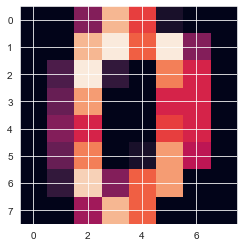

This is supposed to be a 1:


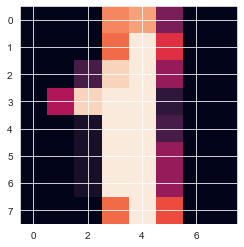

This is supposed to be a 2:


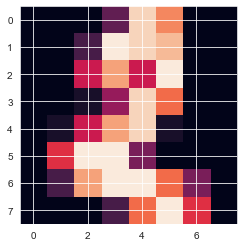

This is supposed to be a 3:


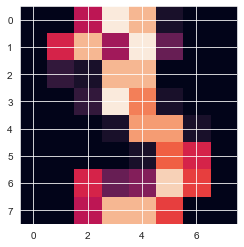

This is supposed to be a 4:


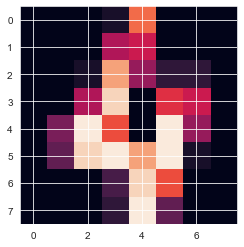

This is supposed to be a 5:


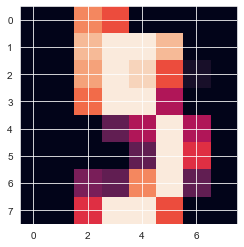

This is supposed to be a 6:


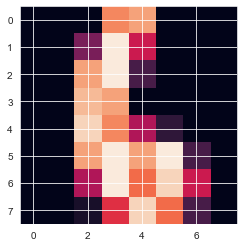

This is supposed to be a 7:


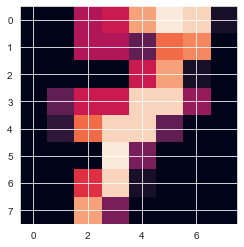

In [120]:
digits = load_digits()
X = digits.data / 255.0
Y = digits.target
print(X.shape, Y.shape)

for i in range(8):  # show 8 examples
    print(f'This is supposed to be a {Y[i]}:')
    plt.imshow(X[i].reshape([8, 8]))
    plt.show()

In [123]:
digits_cov = np.cov(X.T)
print(f'digits_cov.shape {digits_cov.shape}')
lambdas, vecs = sorted_eig(np.array(digits_cov))

W = vecs[:, 0:2]  # just keeping two dimensions
proj_digits = X @ W
print(f'proj_digits.shape is  {proj_digits.shape}')

fig = go.Figure(data=[go.Scatter(x=proj_digits[:,0], y=proj_digits[:,1],# z=Y, #z=proj_digits[:,2],
                                 mode='markers', marker=dict(size=6, opacity=0.7, color=Y), text=['digit='+str(j) for j in Y] )])
fig.update_layout( xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=0, z=1.5)))
fig.show()

digits_cov.shape (64, 64)
proj_digits.shape is  (1797, 2)


In [124]:
W = vecs[:, :3]
proj_digits = X @ W
print(f'proj_digits.shape is {proj_digits.shape}')

fig = go.Figure(data=[go.Scatter3d(x=proj_digits[:,0], y=proj_digits[:,1], z=proj_digits[:,2],
                                   mode='markers', marker=dict(size=4, opacity=0.8, color=Y, showscale=True),
                                   text=['digit='+str(j) for j in Y] )])
fig.update_layout(title="8x8 Handwritten Digits", xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

proj_digits.shape is (1797, 3)


## Graphing Variance vs. Components

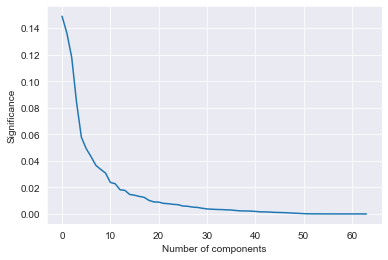

In [125]:
plt.plot( np.abs(lambdas)/np.sum(lambdas) )
plt.xlabel('Number of components')
plt.ylabel('Significance')
plt.show()